   1502928000000  4261.48000000  4485.39000000  4200.74000000  4285.08000000  \
0  1503014400000        4285.08        4371.52        3938.77        4108.37   
1  1503100800000        4108.37        4184.69        3850.00        4139.98   
2  1503187200000        4120.98        4211.08        4032.62        4086.29   
3  1503273600000        4069.13        4119.62        3911.79        4016.00   
4  1503360000000        4016.00        4104.82        3400.00        4040.00   

   795.15037700  1503014399999  3454770.05073206  3427  616.24854100  \
0   1199.888264  1503100799999      5.086958e+06  5233    972.868710   
1    381.309763  1503187199999      1.549484e+06  2153    274.336042   
2    467.083022  1503273599999      1.930364e+06  2321    376.795947   
3    691.743060  1503359999999      2.797232e+06  3972    557.356107   
4    966.684858  1503446399999      3.752506e+06  6494    423.995181   

   2678216.40060401  0  
0      4.129123e+06  0  
1      1.118002e+06  0  
2      1.55

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - loss: 0.0172 - val_loss: 0.0029
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0014 - val_loss: 0.0028
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0012 - val_loss: 0.0033
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0

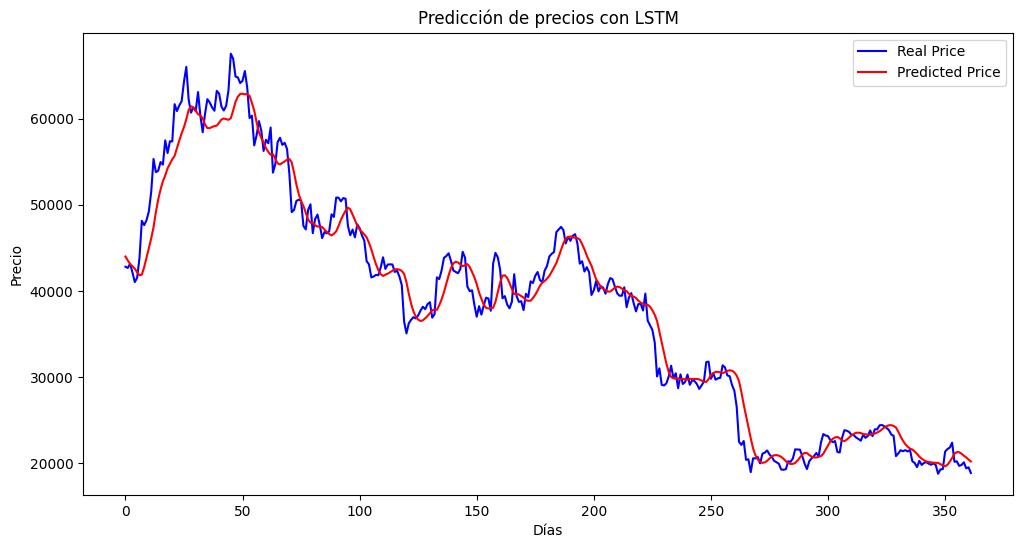

In [2]:
# 📌 Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 📌 Ruta del archivo en Google Colab
file_path = "/content/BTCUSDT.csv"  # Asegúrate de que el archivo está en esta ruta

# 📌 Leer el archivo CSV
df = pd.read_csv(file_path)
print(df.head())  # Muestra las primeras filas para verificar

# 📌 Extraer la columna de precios de cierre
data = df.iloc[:, 4].values  # ⚠️ Modifica el índice si la columna no es la correcta

# 📌 Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

# 📌 Función para crear secuencias
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 50  # Número de días para predecir
X, y = create_sequences(data_scaled, seq_length)

# 📌 Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 📌 Construir el modelo LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 📌 Entrenar el modelo
epochs = 20
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# 📌 Hacer predicciones
y_pred = model.predict(X_test)

# 📌 Desnormalizar los datos
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# 📌 Visualización de resultados
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Real Price', color='blue')
plt.plot(y_pred, label='Predicted Price', color='red')
plt.xlabel('Días')
plt.ylabel('Precio')
plt.legend()
plt.title('Predicción de precios con LSTM')
plt.show()